### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

<AxesSubplot:title={'center':'Percentage of survive %'}, ylabel='survived'>

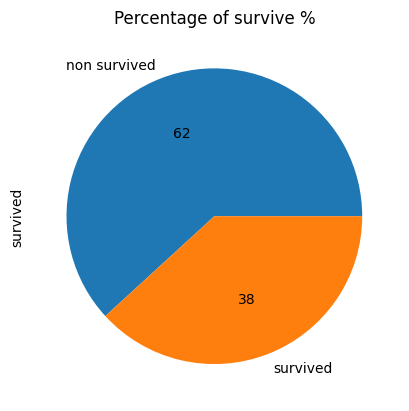

In [49]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

df = pd.read_csv('titanic.csv')
copy_df = df['survived'].value_counts().copy()
copy_df.index = ['non survived','survived']
copy_df.plot(kind='pie',title="Percentage of survive %",legend=False, autopct='%.f')


#### Preprocess the data as it has been done in the lab, feel free to adapt

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# create test and train variables
#x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'pclass':], df['survived'],
#                                                   test_size=0.2, stratify=df['survived'])

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(df[f_names])
df = ohe_new_features(df, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)

df

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.0,0.361142,0.000,0.000000,0.412503,0.0,0.0,1.0
1,1.0,0.0,0.009395,0.125,0.222222,0.295806,1.0,0.0,1.0
2,0.0,0.0,0.022924,0.125,0.222222,0.295806,0.0,0.0,1.0
3,0.0,0.0,0.373669,0.125,0.222222,0.295806,1.0,0.0,1.0
4,0.0,0.0,0.311036,0.125,0.222222,0.295806,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1304,0.0,1.0,0.179506,0.125,0.000000,0.028213,0.0,0.0,0.0
1305,0.0,1.0,0.298509,0.125,0.000000,0.028213,0.0,0.0,0.0
1306,0.0,1.0,0.329826,0.000,0.000000,0.014102,1.0,0.0,0.0
1307,0.0,1.0,0.336089,0.000,0.000000,0.014102,1.0,0.0,0.0


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model 


In [65]:
def split(data,size = 0.2):
    # split data
    return train_test_split(data.loc[:, 'pclass':], data['survived'],
                                                        test_size=size, stratify=data['survived'])

x20_train, x20_test, y20_train, y20_test = split(df,0.2)
x30_train, x30_test, y30_train, y30_test = split(df,0.2) 
x40_train, x40_test, y40_train, y40_test = split(df,0.2) 


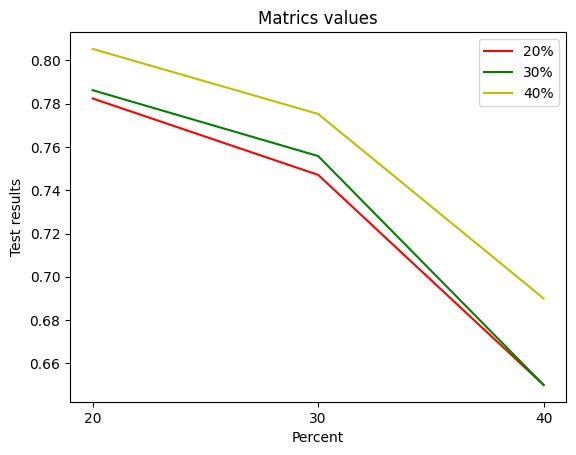

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def LR(x_train,y_train,x_test):
    clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    return clf.predict(x_test)

def metric(y_tests_pred, y_test):
    out = []
    out.append(metrics.accuracy_score(y_test, y_tests_pred))
    out.append(metrics.precision_score(y_test, y_tests_pred))
    out.append(metrics.recall_score(y_test, y_tests_pred))
    return out

pred20 = LR(x20_train,y20_train,x20_test)
pred30 = LR(x30_train,y30_train,x30_test)
pred40 = LR(x40_train,y40_train,x40_test)

m20 = metric(pred20,y20_test)
m30 = metric(pred30,y30_test)
m40 = metric(pred40,y40_test)

val = np.arange(20,50,10)

plt.plot(val,m20,color="r",label='20%')
plt.plot(val,m30,color="g",label='30%')
plt.plot(val,m40,color="y",label='40%')
plt.xticks(np.arange(20,50,10))
plt.xlabel("Percent")
plt.ylabel("Test results")
plt.title("Matrics values")
plt.legend()
plt.show()

## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

In [53]:
#### write your code 

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

`Write your report here`